## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets
boston = datasets.load_boston()
boston_X, boston_y = datasets.load_boston(return_X_y=True)
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

## Simple OLS

In [16]:
from sklearn.linear_model import LinearRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.3, random_state=21)

reg = LinearRegression()  # instantiate regression
reg.fit(X_train, y_train)  # train regression

r2 = reg.score(X_test, y_test)  # get R2 without need to .predict()

y_pred = reg.predict(X_test)  # predicted dependents for test sample
rmse = mean_squared_error(y_pred, y_test, squared=False)  # RMSE for test sample

print(f"R2  : {r2: 0.2f}\nRMSE: {rmse: 0.2f}")

R2  :  0.71
RMSE:  5.25


## Regularized regressions

Regularization penalizes large coefficients in regression to combat overfitting.

### Ridge regression

Ridge regression operates like OLS but, beyond minimizing squared errors, also <u>penalizes squared regression coefficients</u> (**L2 regularization**). This optimization reduces the magnitude of coefficients rather than the number of coefficients.

The penalization weight is the key hyperparameter. The parameter manages the trade-off between overfitting (no penalty) and underfitting (high penalty). It is often set to optimize the prediction performance of a training set. This is called hyperparameter tuning.

In the instantiation of the ridge object **alpha** is the quadratic coefficient size penalty, while **normalize** puts all variables on the same scale 

In [23]:
from sklearn.linear_model import Ridge

In [48]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size = 0.3, random_state=21)

ridge = Ridge(alpha=0.1, normalize=True)  # instantiate regression of Ridge class
ridge.fit(X_train, y_train)

r2 = ridge.score(X_test, y_test)  # get R2 without need to .predict()

y_pred = ridge.predict(X_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)  # RMSE for test sample

print(f"R2  : {r2: 0.2f}\nRMSE: {rmse: 0.2f}")

R2  :  0.70
RMSE:  5.32


### Lasso

Losso regression penalizes absolute regression coefficients (**L1 regularization**). This serves to select features because - unlike Ridge regression - it shrinks coefficients linearly and sets many coefficients to zero.

In [44]:
from sklearn.linear_model import Lasso

In [49]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size = 0.3, random_state=21)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

r2 = lasso.score(X_test, y_test)

y_pred = lasso.predict(X_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)  # RMSE for test sample

print(f"R2  : {r2: 0.2f}\nRMSE: {rmse: 0.2f}")

R2  :  0.58
RMSE:  6.36


Coefficient plotting is particularly helpful for Lasso in order to see which features survived.

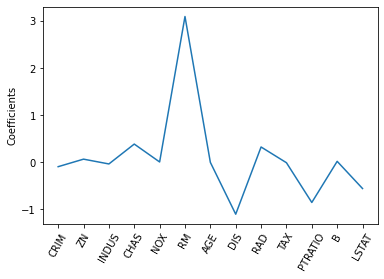

In [62]:
names = boston.feature_names
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_  # useful coef_ attribute
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()